In [3]:
import pandas as pd

## Load agent names

In [274]:
# How to read_csv from google sheet https://medium.com/@Bwhiz/step-by-step-guide-importing-google-sheets-data-into-pandas-ae2df899257f
sheet_name = 'Agent' # replace with your own sheet name
sheet_id = '1QXAKFfXR8oBMXL_mVJx3SkqEpN0qIRG5davdcwCq1-0' # replace with your sheet's ID
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

agent_list = pd.read_csv(url)

agent_name_list = agent_list['agent name'].dropna().str.lower().tolist()
prefix_name = agent_list['prefix_name'].dropna().str.lower().tolist()
owner_pharses = agent_list['owner_pharses'].dropna().str.lower().tolist()
agent_pharses = agent_list['agent_pharses'].dropna().str.lower().tolist()

agent_list.head()

,prefix_name,agent name,owner_pharses,agent_pharses
0,property,Nut Ananganjanagit,เจ้าของขายเอง,co-agent
1,asset,eakapong_r,owner post,co agent
2,condo,Pluto_Landmarks,welcome agent,co-agent welcome
3,estate,MaxTierRealty,agent welcome,co agent welcome
4,prop,suwit,รับ agent,welcome co agent


In [275]:
print(len(agent_name_list))
print(len(prefix_name))
print(len(owner_pharses))
print(len(agent_pharses))

162
32
9
17


## Load facebook_posts.csv

In [276]:
fb_posts = pd.read_csv("./csv_files/facebook/facebook_posts.csv")
fb_posts = fb_posts.drop('Unnamed: 0', axis=1)
fb_posts.head()

,author,content,post_link,post_id
0,JJang Thum,ให้เช่าคอนโด The Keyพหลโยธิน34 \nห้องกว้าง\n...,https://www.facebook.com/groups/13961451675220...,«r2» «r3» «r4» «r6» «r5»
1,JJang Thum,ให้เช่าคอนโด Rich park terminal พหลโยธิน59\n ต...,https://www.facebook.com/groups/13961451675220...,«rs» «rt» «ru» «r10» «rv»
2,ฟาดี้ โซนารี่,หาคอนใกล้ ม.ศรีปทุมค่ะ เดือนละ8-9000,https://www.facebook.com/groups/13961451675220...,«r1i» «r1j» «r1k» «r1m» «r1l»
3,JJang Thum,ให้เช่าโครงการ วันเดอร์ เกษตร Oneder Kaset \n ...,https://www.facebook.com/groups/13961451675220...,«r2d» «r2e» «r2f» «r2h» «r2g»
4,Pappassara Ki,หาหอพักใกล้มอศรีปทุมค่ะ ราคา 3000-5000 ค่ะ ใกล...,https://www.facebook.com/groups/13961451675220...,«r34» «r35» «r36» «r38» «r37»


### Check null values

In [ ]:
def check_link_null(df: pd.DataFrame) -> pd.DataFrame:
    number_of_data_before_drop = len(df)
    number_null_before_drop = df['post_link'].isna().sum()

    print(f"There are {number_null_before_drop} null values of {number_of_data_before_drop} data")
    df = df.dropna(subset=['post_link'])
    number_after_drop = len(df)

    print("============== After drop null values ===============")
    print(f"there are remain {number_after_drop} data")
    
    return df

In [278]:
fb_posts = check_link_null(fb_posts)

There are 3 null values of 50 data
============== After drop null values ===============
there are remain 47 data


## Check length and split to 2 DataFrames

In [279]:
import matplotlib.pyplot as plt

In [280]:
def seeker_renter_split(df: pd.DataFrame) -> pd.DataFrame:
    seeker_df = df[df['content'].str.len() <= 150]
    renter_df = df[df['content'].str.len() > 150]
    null_df = df[df['content'].isnull() == True]

    seeker_df = pd.concat([seeker_df, null_df])

    print(f"Seeker has {len(seeker_df)} data out of {len(df)} in total")
    print(f"Renter has {len(renter_df)} data out of {len(df)} in total")

    return seeker_df, renter_df

In [281]:
room_seeker_df, room_renter_df = seeker_renter_split(fb_posts)

Seeker has 14 data out of 47 in total
Renter has 33 data out of 47 in total


[Text(0, 0, '14'), Text(0, 0, '33')]

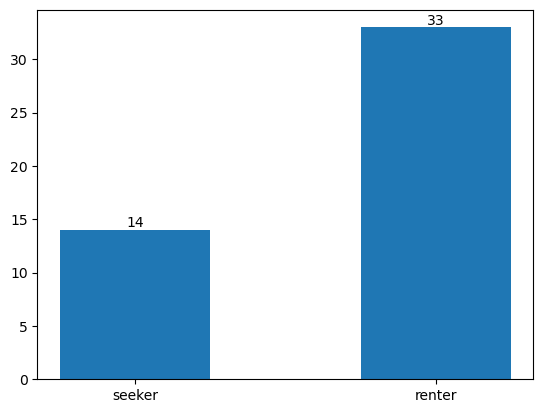

In [283]:
number_of_seeker = len(room_seeker_df)
number_of_renter = len(room_renter_df)

number_of_posts = plt.bar(x=["seeker", "renter"], height=[number_of_seeker, number_of_renter], width=0.5)
plt.bar_label(number_of_posts, labels=[number_of_seeker, number_of_renter])

## Check content if its belong to agent or owner

In [284]:
def check_content(content):
    content = content.replace("-", " ").lower()
    if 'co agent welcome' in content:
        return "agent"
    if any(keyword in content for keyword in owner_pharses):
        return "owner"
    if any(keyword in content for keyword in agent_pharses):
        return "agent"
    return "not sure"

def add_status(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['status'] = df['content'].apply(check_content)
    return df

In [285]:
room_renter_df = add_status(room_renter_df)

In [286]:
# Export new agent names list to csv
agent_author = room_renter_df[room_renter_df['status'] == 'agent']['author'].value_counts()
pd.Series(agent_author).to_csv(".//csv_files/facebook/agent_names_from_renter.csv")

# Export 2 tables to csv
room_renter_df.to_csv(".//csv_files/facebook/room_renter.csv")
room_seeker_df.to_csv(".//csv_files/facebook/room_seeker.csv")